In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/kisho/Downloads/Datasets/train'
valid_path = 'C:/Users/kisho/Downloads/Datasets/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('C:/Users/kisho/Downloads/Datasets/Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/kisho/Downloads/Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('C:/Users/kisho/Downloads/Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r=model.fit_generator(training_set,validation_data=test_set,epochs=50,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/50
2/2 [==============================] - 17s 9s/step - loss: 4.5270 - accuracy: 0.3281 - val_loss: 9.3032 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 10s 7s/step - loss: 9.5542 - accuracy: 0.3906 - val_loss: 5.9430 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 10s 7s/step - loss: 7.3777 - accuracy: 0.3125 - val_loss: 5.3935 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 10s 7s/step - loss: 5.6612 - accuracy: 0.3438 - val_loss: 6.2946 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 10s 7s/step - loss: 3.6092 - accuracy: 0.3750 - val_loss: 4.7248 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 10s 7s/step - loss: 3.0304 - accuracy: 0.3906 - val_loss: 1.5721 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 10s 7s/step - loss: 1.9775 - accuracy: 0.5000 - val_loss: 2.3821 - val_accuracy: 0.5172
Epoch 8/50
2/2 [==================

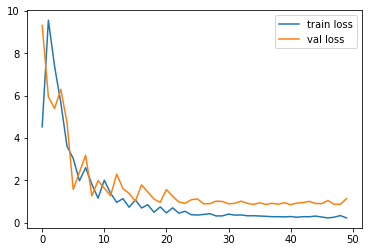

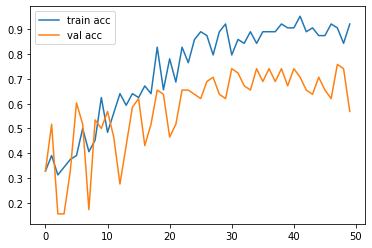

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [24]:
y_pred = model.predict(test_set)

2/2 [==============================] - 7s 2s/step


In [25]:
y_pred


array([[6.51361942e-02, 7.38134503e-01, 1.96729273e-01],
       [3.56304385e-02, 9.55160499e-01, 9.20906849e-03],
       [9.71913397e-01, 3.89633304e-03, 2.41902992e-02],
       [9.08858143e-03, 4.66079041e-02, 9.44303513e-01],
       [3.63092031e-03, 7.57899344e-01, 2.38469735e-01],
       [6.47675812e-01, 3.01915314e-03, 3.49304944e-01],
       [1.86200961e-02, 8.57269287e-01, 1.24110535e-01],
       [2.59067029e-01, 1.66570365e-01, 5.74362576e-01],
       [4.04498726e-02, 1.35094777e-01, 8.24455321e-01],
       [4.68448252e-06, 2.45038646e-05, 9.99970794e-01],
       [9.75420922e-02, 1.74798891e-02, 8.84978056e-01],
       [2.70083733e-02, 4.69081206e-05, 9.72944736e-01],
       [4.25517969e-02, 2.52395868e-01, 7.05052316e-01],
       [6.42240867e-02, 7.63314426e-01, 1.72461525e-01],
       [4.44972008e-01, 9.92131308e-02, 4.55814928e-01],
       [9.30488944e-01, 1.23519879e-02, 5.71591482e-02],
       [2.96618529e-02, 1.37310892e-01, 8.33027303e-01],
       [8.14957976e-01, 7.60517

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2], dtype=int64)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_resnet50.h5')

In [31]:
img=image.load_img('C:/Users/kisho/Downloads/Datasets/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [32]:
img_data

NameError: name 'img_data' is not defined

In [33]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

1/1 [==============================] - 1s 761ms/step


array([[8.4932323e-04, 5.1966263e-04, 9.9863094e-01]], dtype=float32)

In [73]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 157ms/step


In [76]:
a==1

True